# Getting Started with `halomod`

In this tutorial, you'll get a basic familiarity with the layout of `halomod` and some of its features. This is in  no way meant to be exhaustive!

The first thing to note is that `halomod` is based heavily on [hmf](https://github.com/steven-murray/hmf), and there are a bunch of docs for that code that may help you with `halomod`.

Most of the functionality of `halomod` is wrapped up in a few framework classes. Probably the one you'll use most is the `TracerHaloModel`, which as the name suggests implements halo models for tracer populations (like galaxies). There's a similar framework for pure Dark Matter (`DMHaloModel`). 

Let's import that (and a few other things we'll need):

In [1]:
%matplotlib inline
import hmf
import matplotlib.pyplot as plt
import numpy as np

import halomod
from halomod import TracerHaloModel

In [2]:
print(f"Using halomod v{halomod.__version__} and hmf v{hmf.__version__}")

Using halomod v2.0.2.dev51+geee0902 and hmf v3.5.0


## Using the `TracerHaloModel`

As with all frameworks in `halomod` (and `hmf`) all defaults are provided for you, so you can simply create the object:

In [3]:
hm = TracerHaloModel()

/home/sgm/work/halos/halomod/.venv/lib/python3.12/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


Just like that, you have a wide range of quantities available for computation. Note that all the quantities look and feel like they're attributes (i.e. they look like they're just variables pointing to data) but they are properties that lazily compute when they're needed (and are then cached).

Let's have a look at the halo mass function:

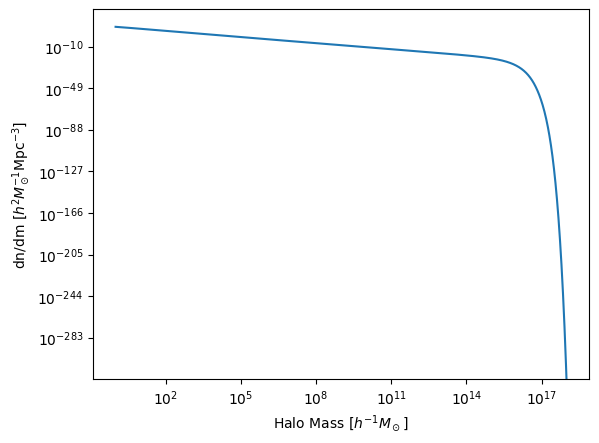

In [4]:
plt.plot(hm.m, hm.dndm)
plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"Halo Mass [$h^{-1} M_\odot$]")
plt.ylabel(r"dn/dm [$h^2 M_\odot^{-1} {\rm Mpc}^{-3}$]");

Most often, what is desired is the power spectrum (or auto-correlation function) of the galaxies:

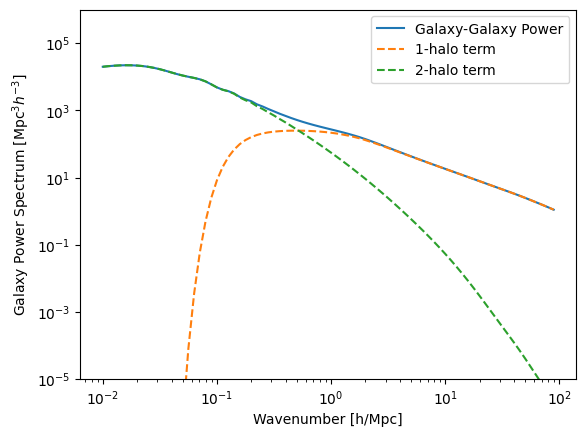

In [5]:
plt.plot(hm.k_hm, hm.power_auto_tracer, label="Galaxy-Galaxy Power")
plt.plot(hm.k_hm, hm.power_1h_auto_tracer, ls="--", label="1-halo term")
plt.plot(hm.k_hm, hm.power_2h_auto_tracer, ls="--", label="2-halo term")


plt.xscale("log")
plt.yscale("log")

plt.ylim(1e-5, 1e6)
plt.legend()
plt.xlabel("Wavenumber [h/Mpc]")
plt.ylabel(r"Galaxy Power Spectrum [${\rm Mpc^3} h^{-3}$]");

You can check all the quantities that are available with

In [6]:
hm.quantities_available()

['ERROR_ON_BAD_MDEF',
 '_central_occupation',
 '_corr_mm_base_fnc',
 '_dlnsdlnm',
 '_do_1halo_integral',
 '_find_m_min',
 '_get_corr_2h_auto_fnc',
 '_get_naive_bias_effective',
 '_get_power_2h_auto_fnc',
 '_get_power_2h_primitive',
 '_growth_factor_fn',
 '_gtm',
 '_normalisation',
 '_power0',
 '_power_halo_centres_fnc',
 '_r_table',
 '_sigma_0',
 '_tm',
 '_total_occupation',
 '_unn_sig8',
 '_unn_sigma0',
 '_unnormalised_lnT',
 '_unnormalised_power',
 'bias',
 'bias_effective_matter',
 'bias_effective_tracer',
 'central_fraction',
 'central_occupation',
 'cmz_relation',
 'colossus_cosmo',
 'corr_1h_auto_matter',
 'corr_1h_auto_matter_fnc',
 'corr_1h_auto_tracer',
 'corr_1h_auto_tracer_fnc',
 'corr_1h_cross_tracer_matter',
 'corr_1h_cross_tracer_matter_fnc',
 'corr_1h_cs_auto_tracer',
 'corr_1h_cs_auto_tracer_fnc',
 'corr_1h_ss_auto_tracer',
 'corr_1h_ss_auto_tracer_fnc',
 'corr_2h_auto_matter',
 'corr_2h_auto_matter_fnc',
 'corr_2h_auto_tracer',
 'corr_2h_auto_tracer_fnc',
 'corr_2h_cro

Thus we could estimate the total fraction of galaxies in the sample that are satellites:

In [7]:
hm.satellite_fraction

0.4366657267260254

Or get the effective galaxy bias:

In [8]:
hm.bias_effective_tracer

1.0403662203981139

Furthermore, some of the properties of the framework are themselves what we call `Component`s. These are entire objects with their own methods for calculating various quantities (some of which have been exposed to the framework interface if they are commonly used).

For example, the `halo_profile` object contains methods for evaluating halo-based properties:

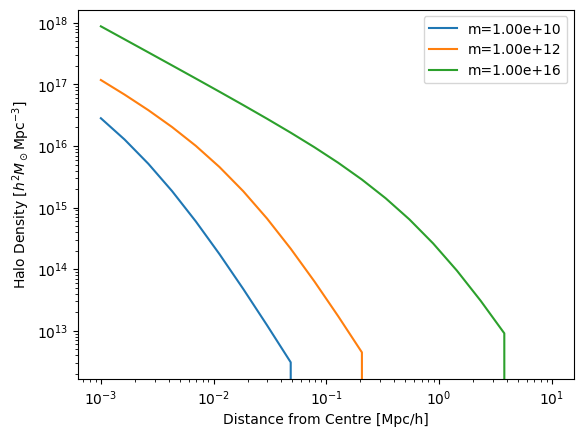

In [9]:
r = np.logspace(-3, 1, 20)
for m in [1e10, 1e12, 1e16]:
    plt.plot(r, hm.halo_profile.rho(r=r, m=m), label=f"m={m:1.2e}")

plt.legend()
plt.yscale("log")
plt.xscale("log")

plt.xlabel("Distance from Centre [Mpc/h]")
plt.ylabel(r"Halo Density [$h^2 M_\odot {\rm Mpc}^{-3}$]");

## Input Parameters

There are _many_ options for the `TracerHaloModel`. One of the motivations for `halomod` is to make it as feature-complete as possible, especially in terms of the input models (and their flexibility).

The documentation for the `TracerHaloModel` itself does not contain all the possible parameters (as many of them are passed through to super-classes). You can see a full list of available parameters with:

In [10]:
TracerHaloModel.parameter_info()

bias_model : Bias Model.

bias_params : Dictionary of parameters for the Bias model.

cosmo_model : instance of `astropy.cosmology.FLRW` subclass
    The basis for the cosmology -- see astropy documentation. Can be a custom
    subclass. Defaults to Planck18.

cosmo_params : dict
    Parameters for the cosmology that deviate from the base cosmology passed.
    This is useful for repeated updates of a single parameter (leaving others
    the same). Default is the empty dict. The parameters passed must match
    the allowed parameters of `cosmo_model`. For the basic class this is
    :Tcmb0: Temperature of the CMB at z=0
    :Neff: Number of massless neutrino species
    :m_nu: Mass of neutrino species (list)
    :H0: The hubble constant at z=0
    :Om0: The normalised matter density at z=0

n : float
    Spectral index of fluctuations
    Must be greater than -3 and less than 4.

sigma_8 : float
    RMS linear density fluctuations in spheres of radius 8 Mpc/h

growth_params : dict
    R

Anything listed here can be set at instantiation time. A few common options might be:

In [11]:
hm_smt3 = TracerHaloModel(
    z=3.0,  # Redshift
    hmf_model="SMT",  # Sheth-Tormen mass function
    cosmo_params={"Om0": 0.3, "H0": 70.0},
)

So then we can compare the correlation functions for each of our defined models:

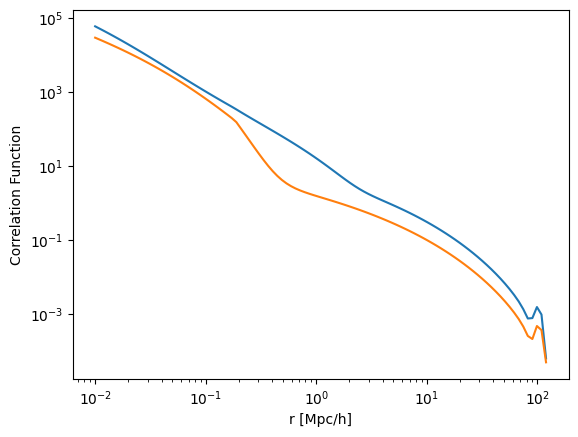

In [12]:
plt.plot(hm.r, hm.corr_auto_tracer, label="Tinker at z=0")
plt.plot(hm_smt3.r, hm_smt3.corr_auto_tracer, label="SMT at z=3")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("r [Mpc/h]")
plt.ylabel("Correlation Function");

Notice that the *first* time we accessed `hm.corr_auto_tracer` it took a few moments to return, because it was computing. Now, however, it will return instantly:

In [13]:
%timeit hm.corr_auto_tracer

97.9 μs ± 6.93 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Some of the parameters passed into `TracerHaloModel` are more complex than simply setting a redshift. Many of the parameters themselves define whole `Component`s. Every one of these has two associated parameters: `component_model` and `component_params`. You've already seen one of these -- the `hmf_model`. There is an associated `hmf_params` which sets arbitrary model-specific parameters, and should be passed as a dictionary. In fact, you saw one of those too: `cosmo_params`. 

Once you've created the object, the actual model instance is available simply as `component` (so for example, `hm.hmf` is a full class instance containing methods for calculating $f(\sigma)$). 

You can check out what parameters are available for a specific model (and their current values) by printing the `.params` variable of the `Component`. For example:

In [14]:
hm_smt3.hmf.params

{'a': 0.707, 'p': 0.3, 'A': None}

thus, passing `hmf_params = {'A':0.3}` would set up a component with different parameters, making it easy to explore parameter space (or constrain those parameters via a fitting/MCMC routine!). 

## Updating parameters in-place

Once you have a framework created, you can update parameters in-place fully consistently. So, if we wanted to update our halo profile to be a `Hernquist` model:

In [15]:
hm.halo_profile_model = "Hernquist"

To ensure it has been properly updated, let's create a new instance:

In [16]:
hm_orig = TracerHaloModel()

And plot the halo profiles:

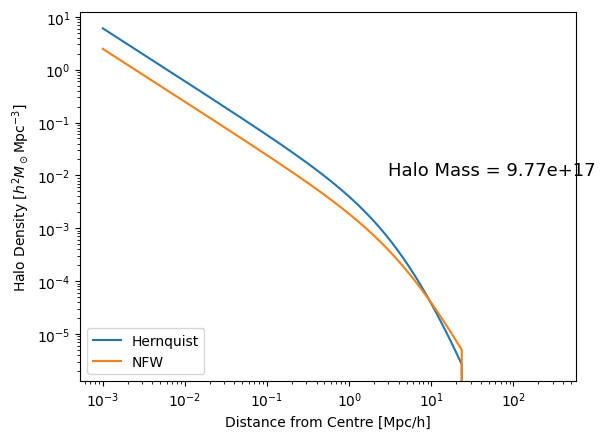

In [17]:
plt.plot(hm._r_table, hm.halo_profile_rho[:, -1], label="Hernquist")
plt.plot(hm._r_table, hm_orig.halo_profile_rho[:, -1], label="NFW")

plt.xscale("log")
plt.yscale("log")
plt.legend(loc="lower left")
plt.text(3, 1e-2, f"Halo Mass = {hm.m[-1]:1.2e}", fontsize=13)

plt.xlabel("Distance from Centre [Mpc/h]")
plt.ylabel(r"Halo Density [$h^2 M_\odot {\rm Mpc}^{-3}$]");

`halomod` inherits the caching system of `hmf`, which means that any updated parameter will automatically invalidate the cache for all dependent quantities, updating them on the next time they are accessed.

## Whirlwind Tour of Components and Models

There are many different kinds of `Component`s that offer several different models each. Let's take a look at some that you could choose from:

* **Cosmology:** All FLRW cosmologies are supported via `astropy`.
* **Transfer Functions:** several commonly-used forms of the transfer function are provided, including: `BBKS`, `BondEfs`, `CAMB`, `EH`, `FromFile`.
* **Growth Factor**: default is to solve the standard integral in a flat-LCDM cosmology, though one can also use the output from `CAMB` which supports arbitrary non-flat FLRW cosmologies. Several other approximations are also implemented (eg. `GenMFGrowth` and `Carroll1992`).
* **Filters**: filters (or window-functions) are convolved with the density field to define "regions" of space associated with overdensities. The standard filter is the `TopHat` (in real-space), but you may also choose other filters such as the `Gaussian`, `SharpK` or `SharpKEllipsoid`. 
* **Mass Definitions**: we provide several standard halo mass definitions (i.e. the definition of what makes a halo a halo). These include `FoF`, `SOMean`, `SOCritical` and `SOVirial`. Explicitly defining the mass definitions allows conversions to be made between definitions.
* **Fitting Functions**: we provide *many* mass function fits reported in the literature, including favourites such as `SMT`, `PS`, `Jenkins01` and `Tinker08`.
* **Halo Bias**: Used to bias haloes with respect to the background clustering. Options include standards such as `SMT01` and `Tinker10`. Also provided is a generic interface to use bias functions from the [COLOSSUS](http://www.benediktdiemer.com/code/colossus/) package.
* **Halo Profiles**: `halomod` implements an extensive system of subclasses for halo density profiles. These will compute the density profile itself, the cumulative mass distribution, the virial radius, the normalized fourier transform of the density profile, and its self-convolution. They all have a consistent API. Models include `NFW`, `Moore`, `Hernquist` and `Einasto`. 
* **Concentration-Mass Relations:** To fully specify a halo profile, one must have a model for the halo concentration. We provide several such models, including `Bullock01`, `Duffy08` and `Ludlow16`. We again provide an interface to use concentration relations from the [COLOSSUS](http://www.benediktdiemer.com/code/colossus/) package.
* **HOD Models**: To link galaxies to the DM haloes, we require a halo occupation distribution. A full-featured system of such models is included, and specific models from certain papers are also included, such as those from `Zheng05` and `Zehavi05`. HOD models are not limited to point-tracers like galaxies -- they are generic enough that smooth occupation distributions can be modelled, for example the occupation of neutral hydrogen.
* **Halo Exclusion**: to increase fidelity of the auto-power spectra on transition scales between the 1- and 2-halo terms, various forms of "halo exclusion" have been proposed. We implement simple models such as `Sphere` exclusion, as well as more complex schemes such as `DblSphere`, `DblEllipsoid` and `NgMatched` (from Tinker+2005). 

The API Documentation has an exhaustive listing of your options for these components and their models.
The key point is that `halomod` is built to be a system in which these various components can be mixed and matched consistently. 

Along with these components, there are many ways to use `halomod`. We've seen the `TracerHaloModel`, but you may also be interested in the `ProjectedCF` (projected correlation function), which performs integrals over the line-of-sight, or the `AngularCF` which produces the angular correlation function. Furthermore, a set of extensions to Warm Dark Matter models is also provided.

## Defining Your Own Models

We've seen that using a new model for a particular `Component` is as simple as passing its string name. However, you can also pass a class directly. For example, to switch to the `Bullock01` concentration-mass relation:

In [18]:
from halomod.concentration import Bullock01

In [19]:
hm.halo_concentration_model = Bullock01
hm.mdef_model = "SOCritical"

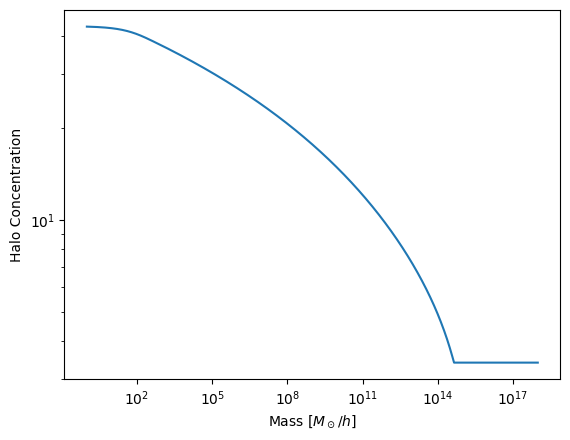

In [20]:
plt.plot(hm.m, hm.cmz_relation)
plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"Mass [$M_\odot/h$]")
plt.ylabel("Halo Concentration");

This also lets you easily define your own models. For example, say we had a crazy idea and thought that a constant concentration (with mass) was a good idea. We could create such a model:

In [21]:
from hmf.halos.mass_definitions import SOCritical

from halomod.concentration import CMRelation

In [22]:
class ConstantConcentration(CMRelation):
    native_mdefs = (SOCritical(),)
    _defaults = {"amplitude": 3}

    def cm(self, m, z=0):
        return self.params["amplitude"] * np.ones_like(m)

Notice that we inherited from `CMRelation`, which provides a basic set of methods that we don't need to define ourselves, and also provides an interface that we must adhere to. In particular, any parameters that should be changeable by the user should be specified (with defaults) in the `_defaults` dictionary. Also, a `cm` method must be implemented which returns the concentration as a function of mass, for a particular redshift. The user-changeable parameters are available as `self.params`. 

We can now instantly use this new definition:

In [23]:
hm.halo_concentration_model = ConstantConcentration

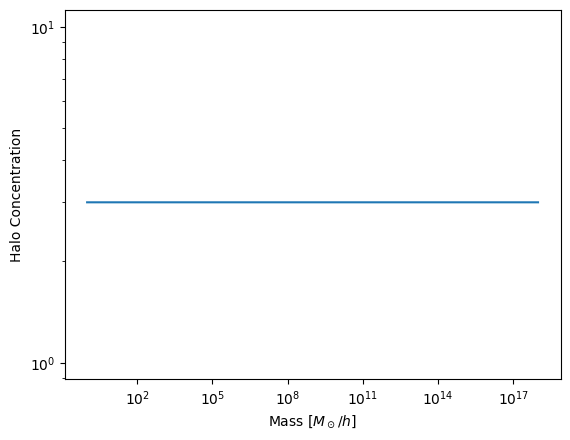

In [24]:
plt.plot(hm.m, hm.cmz_relation)
plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"Mass [$M_\odot/h$]")
plt.ylabel("Halo Concentration");

And we can see what effect this would have on the power spectrum:

/home/sgm/work/halos/halomod/src/halomod/halo_model.py:830: UserWarning: You are using an un-normalized mass function and bias function pair.Bias Tinker10 has the following paired HMF model: (). Matter correlations are not well-defined.
  tools.norm_warn(self)


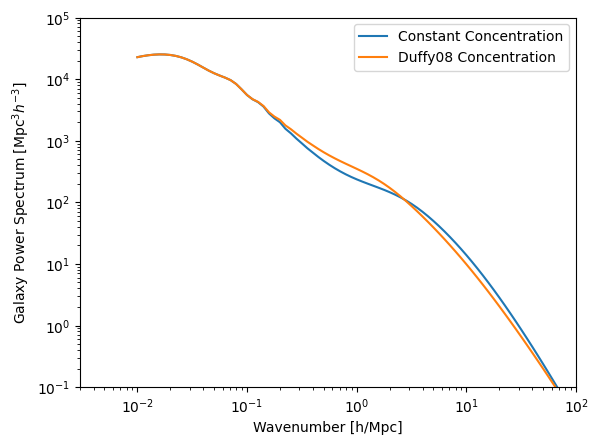

In [25]:
plt.plot(hm.k_hm, hm.power_auto_matter, label="Constant Concentration")
plt.plot(hm_orig.k_hm, hm_orig.power_auto_matter, label="Duffy08 Concentration")

plt.xscale("log")
plt.yscale("log")
plt.xlim(3e-3, 100)
plt.ylim(1e-1, 1e5)

plt.legend()
plt.xlabel("Wavenumber [h/Mpc]")
plt.ylabel(r"Galaxy Power Spectrum [${\rm Mpc^3} h^{-3}$]");

Every single `Component` allows you to create models in this fashion. Some, like the `Profile`, implement a very rich set of functionality for free (for the halo profile, you need only specify one function -- the halo density profile itself -- for a full range of functionality to be available). 